### Projeto analise de series temporais utilizando dados de vendas

Objetivo: prever vendas utilizando dados de vendas ocorridas no período de 2016-06-01 to 2022-01-01

##IMPORTACAO DOS DADOS
    Importar a tabela

##TRATAMENTO DOS DADOS

##ANALISE DOS DADOS
    
       
##CONSTRUCAO DOS GRAFICOS DE SERIES TEMPORAIS: 
    Tendencia, sazonalidade, etc e modelo.  

In [1]:
# Importar a tabela de dados

import pandas as pd
df = pd.read_excel(r"MachineOrders03.xlsx")
df.head()
#display(df)

,Custno,Invdate,year,yearmonth,Invoice,SONO,Partno,descript,prodcl,Product Class,soldby,txnprice,Cur,Rate,totprice
0,294,2016-06-26,2016,2016-06,80956,70993.0,JSE8500,MACHINE GLAZE SPRAYER ECONOMY,72,Jelly Sprayer,HA,0.0000,CAN,1.000000,3890.00
1,2584,2016-06-27,2016,2016-06,80972,70435.0,COM1000iSV-EU-B,CAKEOMATIC 1000iSV - DEPOSIT EU,17,Cake-o-Matic,RO,0.0000,CAN,1.000000,21628.50
2,2584,2016-06-27,2016,2016-06,80972,70435.0,UVL1000iSV,UNIVERSAL 1000iSV,10,Universal,RO,0.0000,CAN,1.000000,27338.37
3,1258,2016-06-28,2016,2016-06,80975,70457.0,CDT3010SV-EU,COMPACT TABLETOP - SV EU NO-TABLE,34,Compact,MH,4486.7846,EUR,0.729927,6146.90
4,1258,2016-06-28,2016,2016-06,80975,70457.0,CDT3010SV-EU,COMPACT TABLETOP - SV EU NO-TABLE,34,Compact,MH,4486.7846,EUR,0.729927,6146.90


In [2]:
# Deletar as colunas q nao necessarias

df = df.drop(["Custno", "Invdate", "year", "Invoice", "SONO", "Partno","descript", "prodcl", "Product Class", "soldby","txnprice", "Cur", "Rate"], axis = 1) 
display(df)

,yearmonth,totprice
0,2016-06,3890.00
1,2016-06,21628.50
2,2016-06,27338.37
3,2016-06,6146.90
4,2016-06,6146.90
...,...,...
6197,2022-01,35206.27
6198,2022-01,69353.79
6199,2022-01,74265.18
6200,2022-01,13780.80


In [3]:
df.info()

#df.dtypes
#df.columns  
#list(df.columns) #print(df.isna().sum()) -> mostra qtde celulas vazias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202 entries, 0 to 6201
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yearmonth  6202 non-null   object 
 1   totprice   6202 non-null   float64
dtypes: float64(1), object(1)
memory usage: 97.0+ KB


In [4]:
pd.to_datetime(df.yearmonth)


0      2016-06-01
1      2016-06-01
2      2016-06-01
3      2016-06-01
4      2016-06-01
          ...    
6197   2022-01-01
6198   2022-01-01
6199   2022-01-01
6200   2022-01-01
6201   2022-01-01
Name: yearmonth, Length: 6202, dtype: datetime64[ns]

In [5]:
#pd.to_datetime(df.yearmonth) # = object -> transf. eh a conversao da coluna yearmonth p/datetime usando df.set
#nessa transf. ele definiu tdo como dia 1 ja q nao tem dia
#nesse codigo acima, o dataframe n foi alterado. Entao o codigo abaxio jogara essa alteracao na mesma coluna

df.yearmonth = pd.to_datetime(df.yearmonth) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202 entries, 0 to 6201
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   yearmonth  6202 non-null   datetime64[ns]
 1   totprice   6202 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 97.0 KB


In [6]:
#agora transf essa nova coluna yearmonth para ser o indice 
df.set_index("yearmonth", inplace=True)


In [7]:
df.info() # com essa transf. q antes era RangeIndex agora se tornou DatetimeIndex. Periodo:2016-06-01 a 2022-01-01


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6202 entries, 2016-06-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totprice  6202 non-null   float64
dtypes: float64(1)
memory usage: 96.9 KB


In [11]:
#Calcular estatistica descritiva para as vendas

round(df.agg({"totprice": ["count", "mean", "std", "min", "max", "median"],}))


,totprice
count,6202.0
mean,22644.0
std,32288.0
min,2004.0
max,730000.0
median,12979.0


In [ ]:
#excluir outlier

<AxesSubplot:xlabel='yearmonth'>

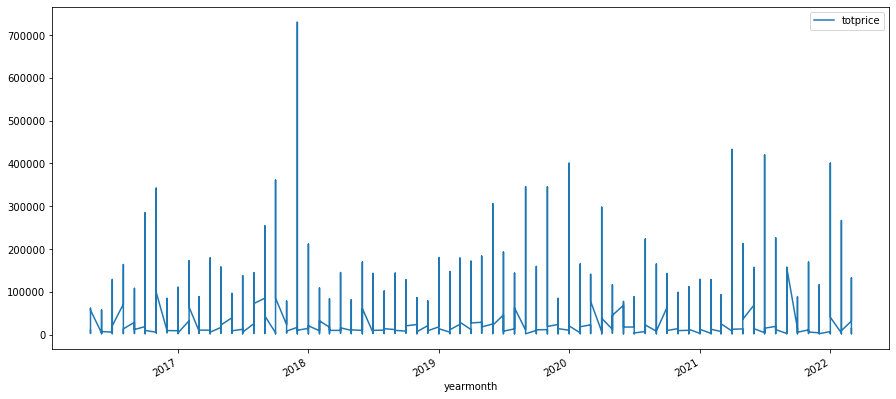

In [8]:
#Transf eh feita por causa do grafico DataFrame.plot() onde requer q o eixo 
df.plot(figsize=(15, 7))